# **QRS Complex and Heartbeat Detection from ECG Signal**
### Axelino Natanael Ndahawali




#### Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#### Load ECG Signal Data

Data yang digunakan adalah data sinyal ECG 12 leads.

In [ ]:
df = pd.read_csv("ECG Effects of Dofetilide etc (12 Lead).txt", sep="\t")

print(df)

A = df.to_numpy()

       sample interval        I       II      III      AVR      AVL      AVF  \
0          (0.001 sec)     (mV)     (mV)     (mV)     (mV)     (mV)     (mV)   
1                    0    0.080    0.260    0.180   -0.170   -0.050    0.220   
2                    1    0.075    0.255    0.180   -0.165   -0.050    0.218   
3                    2    0.070    0.248    0.178   -0.158   -0.053    0.213   
4                    3    0.073    0.245    0.175   -0.158   -0.050    0.210   
...                ...      ...      ...      ...      ...      ...      ...   
9996              9995    0.008    0.845    0.838   -0.425   -0.415    0.840   
9997              9996    0.023    0.630    0.608   -0.325   -0.293    0.618   
9998              9997    0.048    0.403    0.355   -0.225   -0.153    0.378   
9999              9998    0.058    0.388    0.330   -0.223   -0.135    0.358   
10000             9999    0.045    0.463    0.418   -0.255   -0.185    0.440   

            V1       V2       V3       

#### Sampling ECG Signal Data

Setelah didapatkan data dari 12 sinyal tersebut, dilakukan sampling masing-masing sinyal dengan time sampling 0.001s dan jumlah data 10000.

Masukkan Input Sinyal Ke-= 2


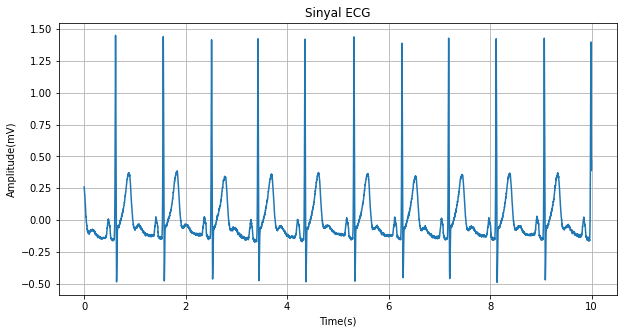

In [ ]:
ts = 0.001
fs = 1/ts
N = 10000

n = A[1:10001,0]
n = np.float64(n)
x1 = A[1:10001,1]
x2 = A[1:10001,2]
x3 = A[1:10001,3]
x4 = A[1:10001,4]
x5 = A[1:10001,5]
x6 = A[1:10001,6]
x7 = A[1:10001,7]
x8 = A[1:10001,8]
x9 = A[1:10001,9]
x10 = A[1:10001,10]
x11 = A[1:10001,11]
x12 = A[1:10001,12]

signal = int(input("Masukkan Input Sinyal Ke-= "))

if signal == 1:
    ecg = x1
elif signal == 2:
    ecg = x2
elif signal == 3:
    ecg = x3
elif signal == 4:
    ecg = x4
elif signal == 5:
    ecg = x5
elif signal == 6:
    ecg = x6
elif signal == 7:
    ecg = x7
elif signal == 8:
    ecg = x8
elif signal == 9:
    ecg = x9
elif signal == 10:
    ecg = x10
elif signal == 11:
    ecg = x11
elif signal == 12:
    ecg = x12
else:
    print("invalid input!")

ecg = np.float64(ecg)
plt.figure(figsize=(10,5))
plt.plot(n*ts,ecg)
plt.title("Sinyal ECG")
plt.xlabel("Time(s)")
plt.ylabel("Amplitude(mV)")
plt.grid()
plt.show()

Data yang digunakan adalah data sinyal II. Penggunaan data sinyal II disini dikarenakan sinyal II memiliki morfologi ECG yang normal dan memiliki noise yang tidak terlalu signifikan, sehingga dalam melakukan segmentasi gelombang P, QRS, dan T; deteksi kompleks QRS; dan penenetuan heartbeatnya dapat dilakukan dengan mudah.

#### Segmentation of P, QRS Complex, and T Waves

Selanjutnya dilakukan segmentasi gelombang P, kompleks QRS, dan gelobang T. Dari sinyal ECG II yang didapatkan, dilakukan sampling kembali dengan mengambil data ke 1-1000 untuk menghasilkan sinyal ECG dengan waktu 1s. Segmentasi dilakukan secara manual, dimana masing-masing gelombang P, kompleks QRS, dan gelombang T dipisahkan dengan range tertentu.

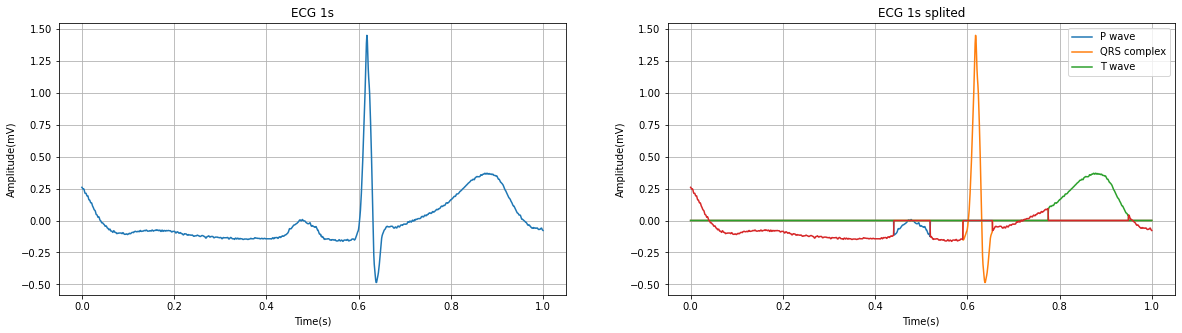

In [ ]:
n_1s = n[0:1001]
x_1s = ecg[0:1001]

x_p = np.zeros(len(n_1s))
x_qrs = np.zeros(len(n_1s))
x_t = np.zeros(len(n_1s))
x_out = np.zeros(len(n_1s))

for i in range(len(n_1s)):
    range_p1 = 440
    range_p2 = 520
    range_qrs1 = 590
    range_qrs2 = 655
    range_t1 = 775
    range_t2 = 950
    if i > range_p1 and i < range_p2:
        x_p[i] = x_1s[i]
    elif i > range_qrs1 and i < range_qrs2:
        x_qrs[i] = x_1s[i]
    elif i > range_t1 and i < range_t2:
        x_t[i] = x_1s[i]
    else:
        x_out[i] = x_1s[i]
        x_p[i] = 0
        x_qrs[i] = 0
        x_t[i] = 0

i = np.arange(len(n_1s))

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.plot(n_1s*ts, x_1s)
plt.title("ECG 1s")
plt.xlabel("Time(s)")
plt.ylabel("Amplitude(mV)")
plt.grid()

plt.subplot(1,2,2)
plt.plot(n_1s*ts, x_p, label='P wave')
plt.plot(n_1s*ts, x_qrs, label='QRS complex')
plt.plot(n_1s*ts, x_t, label='T wave')
plt.plot(n_1s*ts, x_out)
plt.title("ECG 1s splited")
plt.xlabel("Time(s)")
plt.ylabel("Amplitude(mV)")
plt.legend()
plt.grid()

plt.show()

#### Discrete Fourier Transform Algorithm to Determine Frequencies of Each Waves

Setelah dilakukan segmentasi, dilakukan DFT (Discrete Fourier Transform) untuk melihat frequency domain sehingga dapat ditentukan frekuensi cut-off yang akan digunakan dalam filter di langkah selanjutnya.

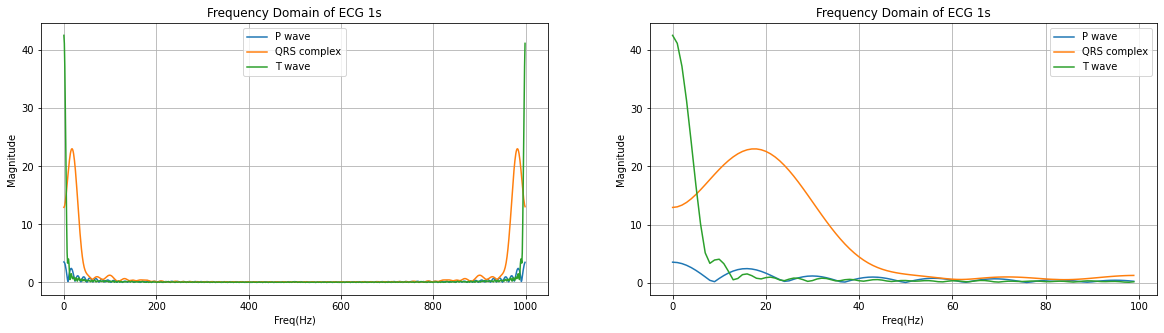

In [ ]:
ndata_1s = len(n_1s)

dft_real_p = np.zeros(len(n_1s))
dft_imaj_p = np.zeros(len(n_1s))
dft_real_qrs = np.zeros(len(n_1s))
dft_imaj_qrs = np.zeros(len(n_1s))
dft_real_t = np.zeros(len(n_1s))
dft_imaj_t = np.zeros(len(n_1s))
dft_p = np.zeros(len(n_1s))
dft_qrs = np.zeros(len(n_1s))
dft_t = np.zeros(len(n_1s))


for k in range(ndata_1s):
    for n in range(ndata_1s):
        dft_real_p[k] += x_p[n]*np.cos(2*np.pi*k*n/ndata_1s)
        dft_imaj_p[k] -= x_p[n]*np.sin(2*np.pi*k*n/ndata_1s)
        dft_real_qrs[k] += x_qrs[n]*np.cos(2*np.pi*k*n/ndata_1s)
        dft_imaj_qrs[k] -= x_qrs[n]*np.sin(2*np.pi*k*n/ndata_1s)
        dft_real_t[k] += x_t[n]*np.cos(2*np.pi*k*n/ndata_1s)
        dft_imaj_t[k] -= x_t[n]*np.sin(2*np.pi*k*n/ndata_1s)
for k in range(ndata_1s):
    dft_p[k] = np.sqrt(np.square(dft_real_p[k]) + np.square(dft_imaj_p[k]))
    dft_qrs[k] = np.sqrt(np.square(dft_real_qrs[k]) + np.square(dft_imaj_qrs[k]))
    dft_t[k] = np.sqrt(np.square(dft_real_t[k]) + np.square(dft_imaj_t[k]))


n = np.arange(ndata_1s,dtype=int)
k = np.arange(ndata_1s,dtype=int)

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.plot(k*fs/ndata_1s, dft_p, label="P wave")
plt.plot(k*fs/ndata_1s, dft_qrs, label="QRS complex")
plt.plot(k*fs/ndata_1s, dft_t, label="T wave")
plt.title("Frequency Domain of ECG 1s")
plt.xlabel("Freq(Hz)")
plt.ylabel("Magnitude")
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(k[0:100]*fs/ndata_1s, dft_p[0:100], label="P wave")
plt.plot(k[0:100]*fs/ndata_1s, dft_qrs[0:100], label="QRS complex")
plt.plot(k[0:100]*fs/ndata_1s, dft_t[0:100], label="T wave")
plt.title("Frequency Domain of ECG 1s")
plt.xlabel("Freq(Hz)")
plt.ylabel("Magnitude")
plt.legend()
plt.grid()

plt.show()

Dapat dilihat pada grafik yang telah diperbesar (kanan), kompleks QRS memiliki frekuensi tengah sebesar 18 Hz. Untuk mengekstrak kompleks QRS, digunakan bandpass filter yang merupakan cascade dari lowpass filter dan highpass filter. Pada Lowpass filter, frekuensi cut-off yang digunakan adalah 31 Hz. Sedangkan pada Highpass filter, frekuensi cut-off yang digunakan adalah 5 Hz.

#### Pan Tompkins Algorithm

Selanjutnya, dapat dilakukan deteksi kompleks QRS dengan menggunakan algotitma Pan Tompkins. Langkah-langkahnya adalah sebagai berikut.


1.   Bandpass Filter

Langkah pertama yaitu memfilter sinyal ECG II menggunakan Bandpass Filter, yang merupakan cascade dari Lowpass Filter dengan frekuensi cut-off 31 Hz dan Highpass Filter dengan frekuensi cut-off 5 Hz. Penggunaan filter di sini bertujuan untuk menghilangkan gelombang P dan T dan juga mereduksi white noise.

2.   Derivative

Derivative dilakukan untuk menguatkan komponen frekuensi tinggi pada kompleks QRS dan menekan komponen frekuensi rendah pada geombang P dan gelombang T.

3.   Squaring

Squaring dilakukan untuk menghasilkan amplitude QRS yang semula negatif menjadi positif.

4.   Moving Average

Moving Average bertujuan untuk menghasilkan output sinyal yang lebih bersih. Lebar window yang digunakan adalah 100.

5.   Threshold

Threshold bertujuan untuk menghasilkan sinyal digital dengan nilai diskrit. Ketika sinyal amplitudonya melebihi threshold maka akan dianggap bernilai satu sedangkan ketika berada dibawah threshold maka nilai akan dianggap nol. Hal tersebut bertujuan agar dapat memudahkan untuk mencari interval antar nilai R ke R (RR Interval).

Masukkan Lebar Window = 100


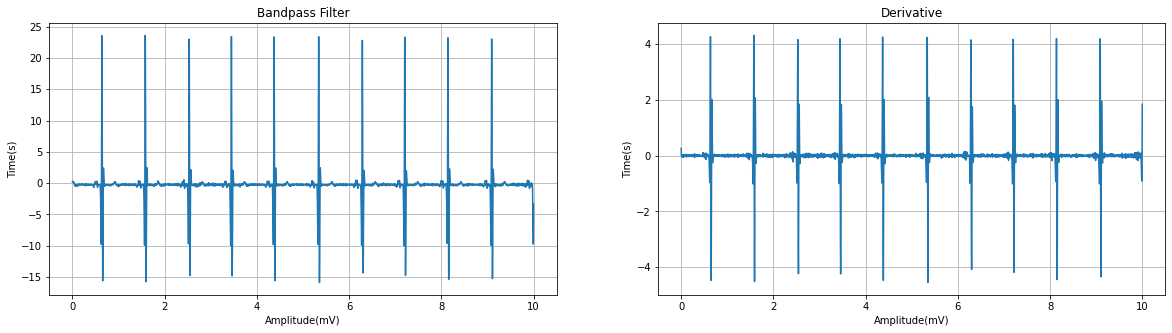

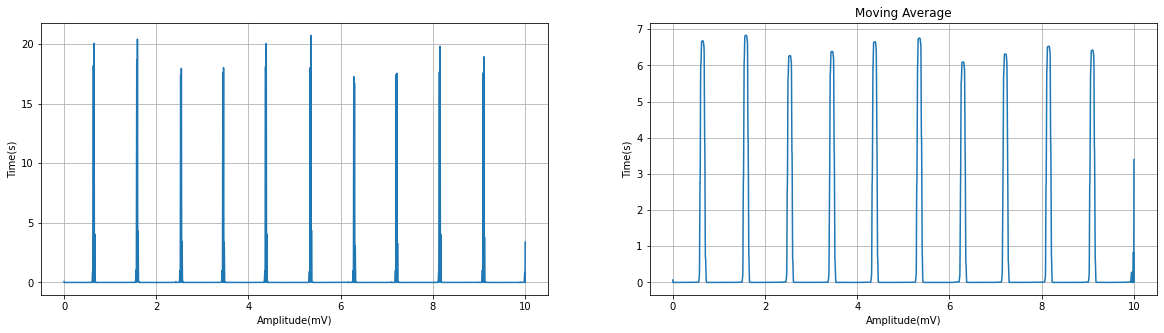

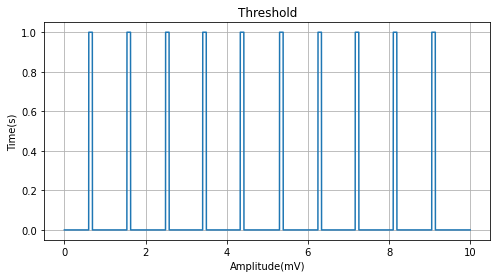

In [ ]:
fc_lpf = 31
fc_hpf = 5
wc_lpf = 2*np.pi*fc_lpf
wc_hpf = 2*np.pi*fc_hpf

def lpf(x):
    y = x.copy()
    for n in range(N):
        y[n] = (((8/np.square(ts)) - (2*wc_lpf)*y[n-1]) - ((4/np.square(ts)) - (2*np.sqrt(2)*wc_lpf/ts) + np.square(wc_lpf)*y[n-2]) + np.square(wc_lpf)*x[n] + 2*np.square(wc_lpf)*x[n-1] + np.square(wc_lpf)*x[n-2]) / ((4/np.square(ts)) - (2*np.sqrt(2)*wc_lpf/ts) + np.square(wc_lpf))
    return y

def hpf(x):
    y = x.copy()
    for n in range(N):
        y[n] = (((8/np.square(ts)) - (2*wc_hpf)*y[n-1]) - ((4/np.square(ts)) - (2*np.sqrt(2)*wc_hpf/ts) + np.square(wc_hpf)*y[n-2]) + (4/np.square(ts))*x[n] - (8/np.square(ts))*x[n-1] + (4/np.square(ts))*x[n-2]) / ((4/np.square(ts)) - (2*np.sqrt(2)*wc_hpf/ts) + np.square(wc_hpf))
    return y

def diff(x):
    y = x.copy()
    for n in range(N):
        if(n < 4):
            continue
        y[n] = (2*x[n] + x[n-1] - x[n-3] - 2*x[n-4])/8
    return y

def squaring(x):
    y = x.copy()
    for n in range(N):
        y[n] = x[n]**2
    return y

def mwi(x, window):
    y = x.copy()
    l = int(window/2)
    for n in range(N):
        tmp_sum = 0
        if(n > 9999-l):
            break
        if(n < l):
            continue
        for i in range(n-l,n+l+1):
            tmp_sum += x[i]
        y[n] = tmp_sum/(l+1)
    return y

def threshold(x):
    y = x.copy()
    max_y = max(y)
    th = max_y*60/100
    for n in range(N):
        if(x[n] < th):
            y[n] = 0
        else:
            y[n] = 1
    return y

window_size = int(input("Masukkan Lebar Window = "))
y1 = lpf(ecg)
y2 = hpf(y1)
y3 = diff(y2)
y4 = squaring(y3)
y5 = mwi(y4, window_size)
y6 = threshold(y5)
n = np.arange(N)

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.plot(n*ts, y2)
plt.title("Bandpass Filter")
plt.xlabel("Amplitude(mV)")
plt.ylabel("Time(s)")
plt.grid()

plt.subplot(1,2,2)
plt.plot(n*ts, y3)
plt.title("Derivative")
plt.xlabel("Amplitude(mV)")
plt.ylabel("Time(s)")
plt.grid()

plt.show()

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.plot(n*ts, y4)
plt.xlabel("Amplitude(mV)")
plt.ylabel("Time(s)")
plt.grid()

plt.subplot(1,2,2)
plt.plot(n*ts, y5)
plt.title("Moving Average")
plt.xlabel("Amplitude(mV)")
plt.ylabel("Time(s)")
plt.grid()

plt.show()

plt.figure(figsize=(8,4))
plt.plot(n*ts, y6)
plt.title("Threshold")
plt.xlabel("Amplitude(mV)")
plt.ylabel("Time(s)")
plt.grid()


plt.show()

#### Heartbeat Calculation

Setelah dilakukan threshold, dapat dilakukan perhitungan untuk menentukan heartbeat dari setiap RR interval dengan menggunakan rumus 60/RR Interval(s). RR interval adalah jarak dari threshold high-low ke low-high.

In [ ]:
temp = np.zeros(N)
rr = np.zeros(N)
j = 0
for i in range(1,N):
    if(y6[i-1]==0) and (y6[i]==1):
        temp[j] = i
        j = j+1
for i in range(1,j):
    rr[i] = abs((temp[i]*ts) - (temp[i-1]*ts))
    print("Heartbeat dari RR ke-" + str(i) + " adalah " + str(60/rr[i]))

Heartbeat dari RR ke-1 adalah 63.76195536663125
Heartbeat dari RR ke-2 adalah 63.02521008403362
Heartbeat dari RR ke-3 adalah 65.57377049180327
Heartbeat dari RR ke-4 adalah 64.86486486486484
Heartbeat dari RR ke-5 adalah 61.98347107438017
Heartbeat dari RR ke-6 adalah 63.35797254487856
Heartbeat dari RR ke-7 adalah 65.359477124183
Heartbeat dari RR ke-8 adalah 64.03415154749204
Heartbeat dari RR ke-9 adalah 63.22444678609063
